# Academic Institution: SimpliLearn

##    Prgram:  PG AI
##    Course No.6: Advanced Deep Learning and Computer Vision
##    Course End Project : Face Recognition using CNN
##    Learner : Chaitanya Kumar Battula
##    Academic Advisior:   Sayan Dey
##   Submitted on : 25-May-2021

# Tasks

## 1. Input the required libraries
## 2. Load the dataset 
## 3. Normalize every image.
## 4. Split the dataset
## 5. Transform the images to equal sizes to feed in CNN
## 6. Build a CNN model that has 3 main layers:

###  i. Convolutional Layer
###  ii. Pooling Layer
###  iii. Fully Connected Layer

## 7. Train the model - Iterate the model until the accuracy is above 90%
## 8. Plot the result
## 9. Save and Re-use the model to predict an unseen data
## 10. Learners Comments

# Task-1:  Input the required libraries 

In [1]:
import numpy as np,  pandas as pd,  matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline




import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard
from keras.utils import np_utils



from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc


import tensorflow as tf
import itertools
import datetime

# Task-2:  Load Dataset   and  Explore Data


In [2]:
# LOAD DATASET


ORL_faces = np.load('ORL_faces.npz') 

print("ORL_faces type:", type(ORL_faces))

ORL_faces type: <class 'numpy.lib.npyio.NpzFile'>


##  (2.1)  View   file Names that are saved in ORL_faces.npz 

In [3]:
# VIEW COMPRESSSED FILES IN THE DATASET

zipped_files = ORL_faces.files

print("Files zipped in ORL_faces.npz:", zipped_files)


Files zipped in ORL_faces.npz: ['testY', 'testX', 'trainX', 'trainY']


##  (2.2)  Extract train, test files from   ORL_faces.npz

In [4]:
# LOAD  "TRAIN IMAGES"
x_train = ORL_faces['trainX']
x_test = ORL_faces['testX']




# LOAD  "TEST IMAGES"
y_train= ORL_faces['trainY']
y_test= ORL_faces['testY']



print("<Type Of Files>")
print("  x_train type: ", type(x_train))
print("  x_ttest type: ", type(x_test))
print("  y_train type: ", type(y_train))
print("  y_test type: ",  type(y_test))
print()
print()

print("<Shape Of Files>")
print("   x_train Shape:",   x_train.shape)
print("   y_train Shape:",   y_train.shape)
print()
print("   x_test  Shape:",   x_test.shape)
print("   y_test  Shape:",   y_test.shape)

<Type Of Files>
  x_train type:  <class 'numpy.ndarray'>
  x_ttest type:  <class 'numpy.ndarray'>
  y_train type:  <class 'numpy.ndarray'>
  y_test type:  <class 'numpy.ndarray'>


<Shape Of Files>
   x_train Shape: (240, 10304)
   y_train Shape: (240,)

   x_test  Shape: (160, 10304)
   y_test  Shape: (160,)


##  (2.3) View  Contents of train,  test files

In [5]:
print("< x_train Contents >")
x_train

< x_train Contents >


array([[ 48.,  49.,  45., ...,  47.,  46.,  46.],
       [ 60.,  60.,  62., ...,  32.,  34.,  34.],
       [ 39.,  44.,  53., ...,  29.,  26.,  29.],
       ...,
       [114., 117., 114., ...,  98.,  96.,  98.],
       [105., 105., 107., ...,  54.,  47.,  41.],
       [116., 114., 117., ...,  95., 100., 101.]])

In [6]:
print("<View x_train contents: 1st Row>")
x_train[0]

<View x_train contents: 1st Row>


array([48., 49., 45., ..., 47., 46., 46.])

In [7]:
print("<View x_train contents: 1st Row, 1st Column Element>")
x_train[0][0]

<View x_train contents: 1st Row, 1st Column Element>


48.0

In [8]:
print("<View x_train contents: 1st Row, Last Column Element>")
x_train[0][10303]

<View x_train contents: 1st Row, Last Column Element>


46.0

In [9]:
print("<View y_train contents:>")
y_train

<View y_train contents:>


array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
        9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11,
       11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14,
       14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15,
       15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18,
       18, 18, 18, 18, 18

##  (2.4) Class Information

In [10]:
print("<  CLASS INFORMATION  >")
classes = np.unique(y_train)


print("   Total number Of classes:", classes.size)
print("   Unique Classes in the data set:", *classes)




<  CLASS INFORMATION  >
   Total number Of classes: 20
   Unique Classes in the data set: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19


# (2.5) View  y-test data

In [11]:
print("y-test data sample:\n\n", y_test )

y-test data sample:

 [ 0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  2  2  2  2  2  2  2  2
  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4  5  5  5  5  5  5  5  5
  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8
  9  9  9  9  9  9  9  9 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11
 12 12 12 12 12 12 12 12 13 13 13 13 13 13 13 13 14 14 14 14 14 14 14 14
 15 15 15 15 15 15 15 15 16 16 16 16 16 16 16 16 17 17 17 17 17 17 17 17
 18 18 18 18 18 18 18 18 19 19 19 19 19 19 19 19]


## (2.6) View Images 
It was given that image size as 112x92. 
But, the numpy data that represents various images is flattened and each row has has 10,304 values.
i.e  112x92 = 10,304
We shall reshape the flattened array (240, 10304) in to (240, 112,92,1) in order to view them as images.



###  (2.6.1) Reshape flatten data to original size 

In [12]:
# RESHAPING X-TRAIN DATA 

images = x_train.reshape(240,112,92,1)

print("< Numpy array Reshaped to an array, that is very similar prior to flattening. > ")
images.shape

< Numpy array Reshaped to an array, that is very similar prior to flattening. > 


(240, 112, 92, 1)

### (2.6.2]  Display image

< Displaying the last image in X_train data. >


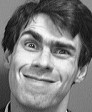

In [13]:
# have choosen the last image, where i=239
i = 239
image = images[i]


print("< Displaying the last image in X_train data. >")
tf.keras.preprocessing.image.array_to_img(image )



# Task.3 - Normalize Image data

##  (3.1)  Normalize 

In [14]:
# NORMALIZE  IMAGES
x_train = np.array(x_train, dtype='float32')/255
x_test  = np.array(x_test,  dtype='float32')/255


##   (3.2)  View data sample after Normalization

In [15]:
# Show the train and test Data format
print("<  IMAGE  DATA  AFTER  NORMALIZATION  >")
print("\n\n")

print('< x_train  after normalization. >\n {}'.format(x_train[:]))
print("\n\n")

print('< Y-train after normalization. > \n {}'.format(y_train))


<  IMAGE  DATA  AFTER  NORMALIZATION  >



< x_train  after normalization. >
 [[0.1882353  0.19215687 0.1764706  ... 0.18431373 0.18039216 0.18039216]
 [0.23529412 0.23529412 0.24313726 ... 0.1254902  0.13333334 0.13333334]
 [0.15294118 0.17254902 0.20784314 ... 0.11372549 0.10196079 0.11372549]
 ...
 [0.44705883 0.45882353 0.44705883 ... 0.38431373 0.3764706  0.38431373]
 [0.4117647  0.4117647  0.41960785 ... 0.21176471 0.18431373 0.16078432]
 [0.45490196 0.44705883 0.45882353 ... 0.37254903 0.39215687 0.39607844]]



< Y-train after normalization. > 
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  1  1
  2  2  2  2  2  2  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  3  3
  4  4  4  4  4  4  4  4  4  4  4  4  5  5  5  5  5  5  5  5  5  5  5  5
  6  6  6  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7  7  7
  8  8  8  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9  9  9  9  9
 10 10 10 10 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11 11 11 11 11
 1

# Task.4 -  Split  Dataset

In [16]:
x_train, x_valid, y_train, y_valid = train_test_split( x_train, y_train, test_size=.05, random_state=1000)


# Task.5 -  Transform Images To Equal Sizes To Feed  in CNN


In [17]:
Original_Image_Size        = (112,92)
Original_Image_Size_List   = list(Original_Image_Size)
Rank = 1
Original_Image_Size_List.append(Rank)
Image_Shape    = tuple(Original_Image_Size_List)
print("Original Single Image Shape:", Image_Shape)
print()



# CHANGE SIZE OF IMAGES
x_train  = x_train.reshape(x_train.shape[0], *Image_Shape)
x_valid  = x_valid.reshape(x_valid.shape[0], *Image_Shape)
x_test   = x_test.reshape(x_test.shape[0],   *Image_Shape)




print("< DATA SHAPES AFTER  RESHAPING >")
print('   x_train shape: {}'.format(x_train.shape))
print('   x_valid  shape: {}'.format(x_valid.shape))
print('   x_test  shape: {}'.format(x_test.shape))



Original Single Image Shape: (112, 92, 1)

< DATA SHAPES AFTER  RESHAPING >
   x_train shape: (228, 112, 92, 1)
   x_valid  shape: (12, 112, 92, 1)
   x_test  shape: (160, 112, 92, 1)


# Task.6-  Build CNN model with 3 main layers: 
###   1-  Convolotional layer 
###   2-   pooling layer  
###   3-   fully connected layer
 
 

##  (6.2)   Build Model 

In [18]:
CNN_Model= Sequential([ Conv2D(filters=36, kernel_size=7, activation='relu', input_shape= Image_Shape),
                        MaxPooling2D(pool_size=2),
                        Conv2D(filters=54, kernel_size=5, activation='relu', input_shape= Image_Shape),
                        MaxPooling2D(pool_size=2),
                        Flatten(),
                        Dense(4048, activation='relu'),
                        Dropout(0.5),
                        Dense(2024, activation='relu'),
                        Dropout(0.5),
                        Dense(1024, activation='relu'),
                        Dropout(0.5),
                        Dense(512, activation='relu'),
                        Dropout(0.5),
                        Dense(20, activation='softmax')  
                      ])



CNN_Model.compile( loss='sparse_categorical_crossentropy',
                    optimizer=Adam(lr=0.0001),
                    metrics=['accuracy']
                )



## (6.2)  View Model Summary

In [19]:
CNN_Model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 106, 86, 36)       1800      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 53, 43, 36)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 49, 39, 54)        48654     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 19, 54)        0         
_________________________________________________________________
flatten (Flatten)            (None, 24624)             0         
_________________________________________________________________
dense (Dense)                (None, 4048)              99682000  
_________________________________________________________________
dropout (Dropout)            (None, 4048)              0

# Task.7 -  Model Training 



##  (7.1)   Model Training 

In [20]:
print(" Model training Has Started- Please wait.\n")
Training_Start_time = datetime.datetime.now()

Model_Training_history = CNN_Model.fit( np.array(x_train), 
                         np.array(y_train), 
                         batch_size = 128, #256, #512 
                         epochs = 300, 
                         verbose = 2,
                         validation_data = (np.array(x_valid), 
                                            np.array(y_valid))     )


Training_End_time = datetime.datetime.now()  
time_delta = (Training_End_time - Training_Start_time )
total_seconds = time_delta.total_seconds()
minutes = total_seconds/60

print("Traing Start Time :",   Training_Start_time )
print("Traing End Time   :",   Training_End_time )
print("Total time taken for Training the model(mins):", int(minutes) )



 Model training Has Started- Please wait.

Epoch 1/300
2/2 - 9s - loss: 3.0386 - accuracy: 0.0526 - val_loss: 3.0577 - val_accuracy: 0.0000e+00
Epoch 2/300
2/2 - 5s - loss: 3.0531 - accuracy: 0.0526 - val_loss: 3.0436 - val_accuracy: 0.0000e+00
Epoch 3/300
2/2 - 5s - loss: 3.1182 - accuracy: 0.0307 - val_loss: 3.0290 - val_accuracy: 0.0000e+00
Epoch 4/300
2/2 - 5s - loss: 3.0606 - accuracy: 0.0702 - val_loss: 3.0094 - val_accuracy: 0.0000e+00
Epoch 5/300
2/2 - 5s - loss: 3.0172 - accuracy: 0.0482 - val_loss: 3.0066 - val_accuracy: 0.0000e+00
Epoch 6/300
2/2 - 5s - loss: 3.0780 - accuracy: 0.0439 - val_loss: 2.9979 - val_accuracy: 0.0000e+00
Epoch 7/300
2/2 - 5s - loss: 3.0245 - accuracy: 0.0351 - val_loss: 2.9927 - val_accuracy: 0.0833
Epoch 8/300
2/2 - 5s - loss: 2.9871 - accuracy: 0.0658 - val_loss: 2.9894 - val_accuracy: 0.0000e+00
Epoch 9/300
2/2 - 5s - loss: 2.9847 - accuracy: 0.0570 - val_loss: 2.9891 - val_accuracy: 0.0000e+00
Epoch 10/300
2/2 - 5s - loss: 2.9929 - accuracy: 0.0

Epoch 84/300
2/2 - 33s - loss: 0.2329 - accuracy: 0.9386 - val_loss: 0.0555 - val_accuracy: 1.0000
Epoch 85/300
2/2 - 9s - loss: 0.2660 - accuracy: 0.9211 - val_loss: 0.0448 - val_accuracy: 1.0000
Epoch 86/300
2/2 - 9s - loss: 0.2578 - accuracy: 0.9342 - val_loss: 0.0344 - val_accuracy: 1.0000
Epoch 87/300
2/2 - 9s - loss: 0.2932 - accuracy: 0.8947 - val_loss: 0.0331 - val_accuracy: 1.0000
Epoch 88/300
2/2 - 8s - loss: 0.2204 - accuracy: 0.9386 - val_loss: 0.0403 - val_accuracy: 1.0000
Epoch 89/300
2/2 - 9s - loss: 0.1934 - accuracy: 0.9342 - val_loss: 0.0515 - val_accuracy: 1.0000
Epoch 90/300
2/2 - 10s - loss: 0.2185 - accuracy: 0.9430 - val_loss: 0.0440 - val_accuracy: 1.0000
Epoch 91/300
2/2 - 9s - loss: 0.1993 - accuracy: 0.9430 - val_loss: 0.0363 - val_accuracy: 1.0000
Epoch 92/300
2/2 - 9s - loss: 0.1603 - accuracy: 0.9518 - val_loss: 0.0307 - val_accuracy: 1.0000
Epoch 93/300
2/2 - 9s - loss: 0.1399 - accuracy: 0.9649 - val_loss: 0.0230 - val_accuracy: 1.0000
Epoch 94/300
2/2 -

Epoch 166/300
2/2 - 5s - loss: 0.0183 - accuracy: 0.9956 - val_loss: 1.4758e-04 - val_accuracy: 1.0000
Epoch 167/300
2/2 - 5s - loss: 0.0112 - accuracy: 1.0000 - val_loss: 1.2114e-04 - val_accuracy: 1.0000
Epoch 168/300
2/2 - 5s - loss: 0.0249 - accuracy: 0.9912 - val_loss: 8.7231e-05 - val_accuracy: 1.0000
Epoch 169/300
2/2 - 5s - loss: 0.0069 - accuracy: 1.0000 - val_loss: 6.8160e-05 - val_accuracy: 1.0000
Epoch 170/300
2/2 - 5s - loss: 0.0092 - accuracy: 1.0000 - val_loss: 5.8916e-05 - val_accuracy: 1.0000
Epoch 171/300
2/2 - 5s - loss: 0.0052 - accuracy: 1.0000 - val_loss: 5.3087e-05 - val_accuracy: 1.0000
Epoch 172/300
2/2 - 5s - loss: 0.0334 - accuracy: 0.9912 - val_loss: 6.3402e-05 - val_accuracy: 1.0000
Epoch 173/300
2/2 - 5s - loss: 0.0089 - accuracy: 1.0000 - val_loss: 9.5352e-05 - val_accuracy: 1.0000
Epoch 174/300
2/2 - 5s - loss: 0.0103 - accuracy: 1.0000 - val_loss: 1.2664e-04 - val_accuracy: 1.0000
Epoch 175/300
2/2 - 5s - loss: 0.0074 - accuracy: 1.0000 - val_loss: 1.65

Epoch 246/300
2/2 - 5s - loss: 0.0080 - accuracy: 0.9956 - val_loss: 5.4365e-05 - val_accuracy: 1.0000
Epoch 247/300
2/2 - 5s - loss: 0.0045 - accuracy: 1.0000 - val_loss: 4.5439e-05 - val_accuracy: 1.0000
Epoch 248/300
2/2 - 5s - loss: 0.0234 - accuracy: 0.9868 - val_loss: 3.2797e-05 - val_accuracy: 1.0000
Epoch 249/300
2/2 - 5s - loss: 0.0108 - accuracy: 0.9956 - val_loss: 2.5557e-05 - val_accuracy: 1.0000
Epoch 250/300
2/2 - 5s - loss: 0.0036 - accuracy: 1.0000 - val_loss: 2.5676e-05 - val_accuracy: 1.0000
Epoch 251/300
2/2 - 5s - loss: 0.0088 - accuracy: 0.9956 - val_loss: 3.5538e-05 - val_accuracy: 1.0000
Epoch 252/300
2/2 - 5s - loss: 0.0045 - accuracy: 1.0000 - val_loss: 5.3102e-05 - val_accuracy: 1.0000
Epoch 253/300
2/2 - 5s - loss: 0.0044 - accuracy: 1.0000 - val_loss: 7.8991e-05 - val_accuracy: 1.0000
Epoch 254/300
2/2 - 5s - loss: 0.0043 - accuracy: 1.0000 - val_loss: 1.2126e-04 - val_accuracy: 1.0000
Epoch 255/300
2/2 - 5s - loss: 0.0059 - accuracy: 1.0000 - val_loss: 1.62

##  (7.2)  Model Evaluationn 

In [21]:
Score = CNN_Model.evaluate( np.array(x_test),  
                            np.array(y_test), 
                            verbose=0
                          )

Loss      =  Score[0] * 100
Accuracy  =  Score[1] * 100


print("< Model Evalaution Results  >")
print('   Test Loss     :   {:.2f} %'.format(Loss))
print('   Test accuracy :   {:.2f} %'.format(Accuracy))

< Model Evalaution Results  >
   Test Loss     :   42.74 %
   Test accuracy :   95.00 %


# Task.8 -  Plot:  Result

##  (8.1)  View History Dictionary Keys 

In [22]:
print(Model_Training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


##  (8.2)  Data  Required for Plotting Result 

In [23]:

accuracy     =  Model_Training_history.history['accuracy']
val_accuracy =  Model_Training_history.history['val_accuracy']

loss         =  Model_Training_history.history['loss']
val_loss     =  Model_Training_history.history['val_loss']

##  (8.3)  Plot  Model Accuracy   and  Model  Loss

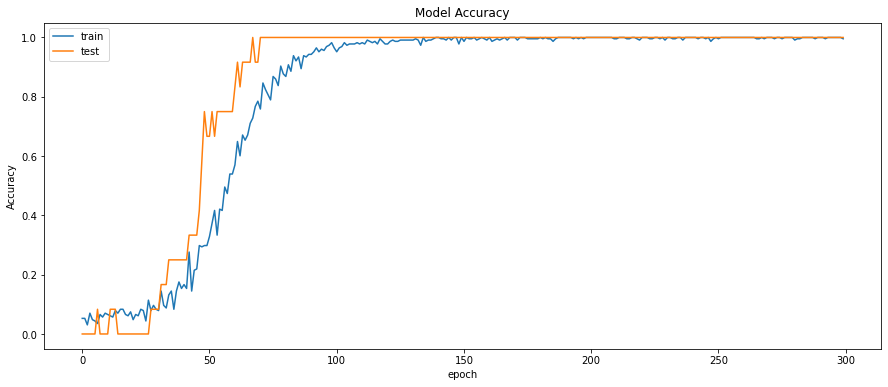

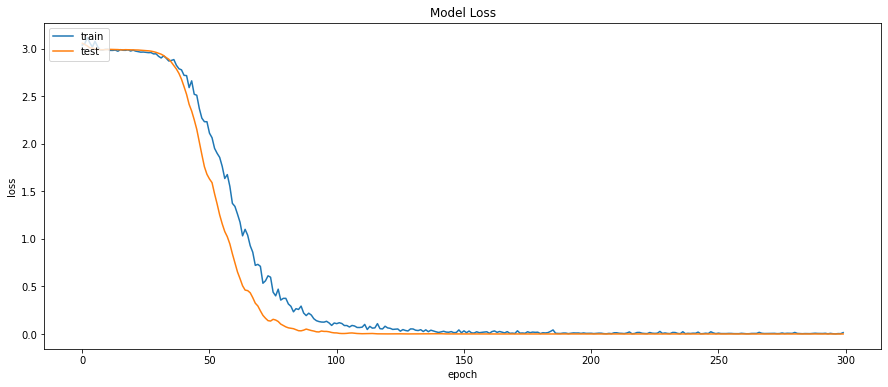

In [24]:
# PLOT  MODEL  ACCURACY
plt.figure(figsize=(15,6))
plt.plot(accuracy)
plt.plot(val_accuracy )
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('Model Accuracy.png', dpi=300, bbox_inches='tight')
plt.show()
print()


# PLOT  MODEL  LOSS
plt.figure(figsize=(15,6))
plt.plot(loss)
plt.plot(val_loss)
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('Model Loss.png', dpi=300, bbox_inches='tight')
plt.show()

## (8.4)  Model Accuracy

In [25]:
y_predicted = CNN_Model.predict_classes(x_test)
# print("y_predicted :", y_predicted )
Accuracy = accuracy_score(y_test, y_predicted)
print(" Model accuracy: %.1f %%" % (Accuracy*100))


C:\Users\USER\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


 Model accuracy: 95.0 %


## (8.5)  Plot : Confusion Matrix

###  (8.5.1)    Obtain Confusion Matrix 

In [26]:
print("< Confusion matrix  >\n%s" % confusion_matrix(np.array(y_test), y_predicted))

< Confusion matrix  >
[[8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 6 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0]
 [0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 2 0 6 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0]
 [2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 6 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0]
 [0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 6 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8]]


###  (8.5.2)   View Confusion Matrix summary in a Cross table

In [27]:
pd.crosstab(y_test, y_predicted, rownames = ['Actual'], colnames =['Predicted'], margins = True)

Predicted,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,All
Actual,,,,,,,,,,,,,,,,,,,,,
0,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
1,0,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
2,0,0,8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
3,0,0,0,8,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
4,0,0,0,0,6,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,8
5,0,0,0,0,0,8,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
6,0,0,0,0,0,0,8,0,0,0,...,0,0,0,0,0,0,0,0,0,8
7,0,0,0,0,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,8
8,0,0,0,0,0,0,0,0,8,0,...,0,0,0,0,0,0,0,0,0,8


### (8.5.3)   Graphical Presentation of Confusion Matrix

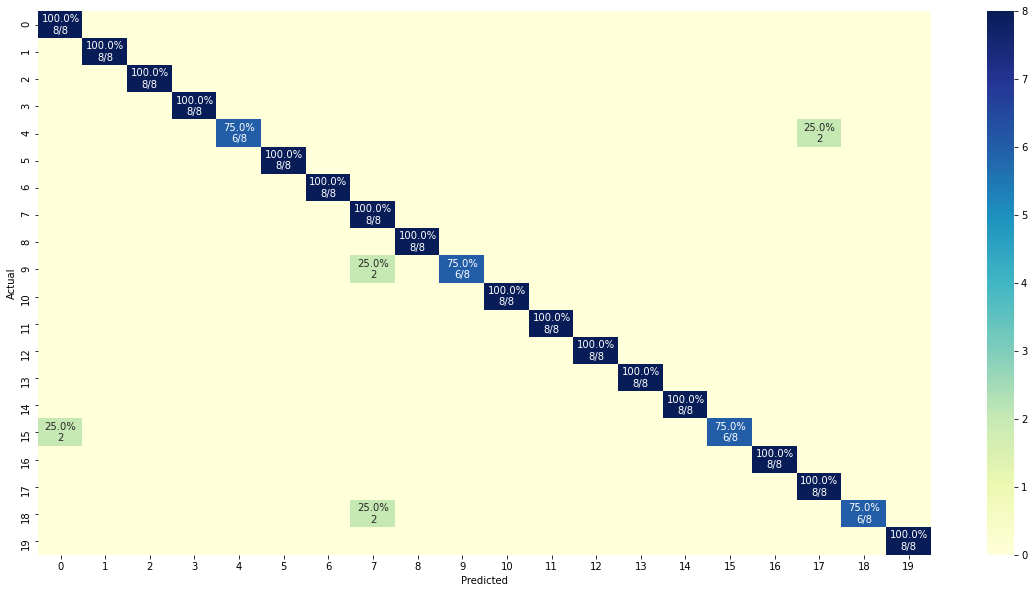

In [28]:
def plot_cm(y_true, y_pred, figsize=(20,10)):
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_true))
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, cmap= "YlGnBu", annot=annot, fmt='', ax=ax)
    
plot_cm(y_test, y_predicted)

###  (8.5.4)  Classification Report

In [29]:
print("< Classification Report >\n")
print(classification_report(np.array(y_test), y_predicted))

< Classification Report >

              precision    recall  f1-score   support

           0       0.80      1.00      0.89         8
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00         8
           4       1.00      0.75      0.86         8
           5       1.00      1.00      1.00         8
           6       1.00      1.00      1.00         8
           7       0.67      1.00      0.80         8
           8       1.00      1.00      1.00         8
           9       1.00      0.75      0.86         8
          10       1.00      1.00      1.00         8
          11       1.00      1.00      1.00         8
          12       1.00      1.00      1.00         8
          13       1.00      1.00      1.00         8
          14       1.00      1.00      1.00         8
          15       1.00      0.75      0.86         8
          16       1.00      1.00      1.00         8


# Task.9 :  Save  and Deploy Model

##  (9.1)  Save the CNN Model 

In [30]:
CNN_Model.save("ORL_Faces_CNN_Model.h5")

print("Model Saved to Disk.")
    

Model Saved to Disk.


##  (9.2)  Deploy the Saved Model 

In [31]:
from keras.models import load_model

# Load Model
model = load_model('ORL_Faces_CNN_Model.h5')

# Summarize model.
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 106, 86, 36)       1800      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 53, 43, 36)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 49, 39, 54)        48654     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 19, 54)        0         
_________________________________________________________________
flatten (Flatten)            (None, 24624)             0         
_________________________________________________________________
dense (Dense)                (None, 4048)              99682000  
_________________________________________________________________
dropout (Dropout)            (None, 4048)              0

## (9.3)  Predict an Unseen  Data 

In [32]:
sample = x_test[18:19]
target = y_test[19]

y_predicted = CNN_Model.predict_classes(sample)


print("<SAVED MODEL DEPLOYED TO PREDICT AN UNSEEN DATA :>")
print("y_predicted  : ", *y_predicted)
print("Actual class : ", target)



C:\Users\USER\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


<SAVED MODEL DEPLOYED TO PREDICT AN UNSEEN DATA :>
y_predicted  :  2
Actual class :  2


# Learners Comments

1)  Precision indicates that the ratio of correctly predicted positive observations to the total predicted positive observations is 100% in 17 out of 20 cases, resulting in a precission value of 96%. In those 3 cases too the  precesion is not awfully bad, as they are found to be resonably good around 80%. 

2) When it comes to recall, the model correctly identifies 96% of True Positives.

3) Finally when it comes to accuracy, I am glad that I am able to present a model with 95% accuracy, albeit not as high as 100%. For unknown reasons the accuracy fluctuates between 95% to 99%, when run on different occasions. I would definitely like to see it consistently presenting 100% accuracy and I would continue my endeavour.


4) I have saved the model to the disk in local machine and reused it to predict an unseen data and it predicted with 100% accuracy.

5) All in all, I would say, that a different CNN model if designed for face recognition in similar lines could be used in real life situation with a confidence of more than 95%.

<<  End Of The Project >>